In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error


In [ ]:
import pandas as pd
df = pd.read_csv("data.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,0,0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,1,1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,2,2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
3,3,3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1
4,4,4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1


In [ ]:
df.shape

(893, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       893 non-null    int64  
 1   Unnamed: 0         893 non-null    int64  
 2   brand              893 non-null    object 
 3   name               893 non-null    object 
 4   price              893 non-null    int64  
 5   spec_rating        893 non-null    float64
 6   processor          893 non-null    object 
 7   CPU                893 non-null    object 
 8   Ram                893 non-null    object 
 9   Ram_type           893 non-null    object 
 10  ROM                893 non-null    object 
 11  ROM_type           893 non-null    object 
 12  GPU                893 non-null    object 
 13  display_size       893 non-null    float64
 14  resolution_width   893 non-null    float64
 15  resolution_height  893 non-null    float64
 16  OS                 893 non

In [ ]:
df.isnull().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
brand,0
name,0
price,0
spec_rating,0
processor,0
CPU,0
Ram,0
Ram_type,0


In [ ]:
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Ram'] = df['Ram'].astype(int)

In [ ]:
df.columns

Index(['brand', 'price', 'spec_rating', 'processor', 'CPU', 'Ram', 'Ram_type',
       'ROM', 'ROM_type', 'GPU', 'display_size', 'resolution_width',
       'resolution_height', 'OS', 'warranty'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              893 non-null    object 
 1   price              893 non-null    int64  
 2   spec_rating        893 non-null    float64
 3   processor          893 non-null    object 
 4   CPU                893 non-null    object 
 5   Ram                893 non-null    int64  
 6   Ram_type           893 non-null    object 
 7   ROM                893 non-null    object 
 8   ROM_type           893 non-null    object 
 9   GPU                893 non-null    object 
 10  display_size       893 non-null    float64
 11  resolution_width   893 non-null    float64
 12  resolution_height  893 non-null    float64
 13  OS                 893 non-null    object 
 14  warranty           893 non-null    int64  
dtypes: float64(4), int64(3), object(8)
memory usage: 104.8+ KB


In [ ]:
df.head()

,brand,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,HP,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,HP,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,Acer,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
3,Lenovo,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1
4,Apple,69990,69.323529,Apple M1,Octa Core (4P + 4E),8,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1


In [ ]:
df = pd.get_dummies(df, drop_first=True)


In [ ]:
df.shape

(893, 411)

In [ ]:
X = df.drop('price', axis=1)
y = df['price']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_lr))


Linear Regression R2 Score: 0.8259244890163708
Linear Regression MAE: 14093.601436700048


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))


Random Forest R2 Score: 0.8295327792197098
Random Forest MAE: 13228.160171499512


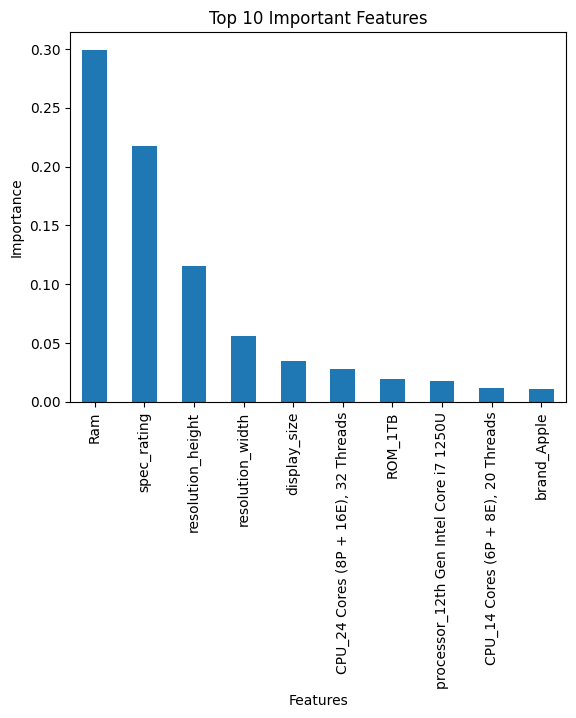

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
top_features = feature_importance.sort_values(ascending=False).head(10)

plt.figure()
top_features.plot(kind='bar')
plt.title("Top 10 Important Features")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


In [ ]:
sample = X_test.iloc[0:1]

print("Actual Price:", y_test.iloc[0])
print("Predicted Price (RF):", rf.predict(sample)[0])


Actual Price: 83090
Predicted Price (RF): 83342.74238095239
